In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os as os

In [5]:

departments = pd.read_csv('./data/instacart/departments.csv')
orders = pd.read_csv('./data/instacart/orders.csv')
aisles = pd.read_csv('./data/instacart/aisles.csv')
products = pd.read_csv('./data/instacart/products.csv')
order_products_prior = pd.read_csv('./data/instacart/order_products__prior.csv')
order_products_train = pd.read_csv('./data/instacart/order_products__train.csv')

In [6]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [7]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [8]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [9]:
products_and_aisle= pd.merge(products, aisles, on='aisle_id', how='left')


In [10]:
products_complete = pd.merge(products_and_aisle, departments, on='department_id', how='left')
products_complete.head()

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,2,All-Seasons Salt,104,13,spices seasonings,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry


In [11]:
products_complete.drop(columns=['aisle_id', 'department_id'], inplace=True)
products_complete.head()

,product_id,product_name,aisle,department
0,1,Chocolate Sandwich Cookies,cookies cakes,snacks
1,2,All-Seasons Salt,spices seasonings,pantry
2,3,Robust Golden Unsweetened Oolong Tea,tea,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,frozen meals,frozen
4,5,Green Chile Anytime Sauce,marinades meat preparation,pantry


In [12]:

orders_record_train = orders.loc[orders['eval_set'] == 'train'].copy()
orders_record_prior = orders.loc[orders['eval_set'] == 'prior'].copy()

In [13]:
orders_record_train.isna().sum()

order_id                  0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

In [14]:
orders_record_prior.isna().sum()


order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [15]:

display(orders_record_prior.head())
display(order_products_prior.head())

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [16]:
orders_record_prior['days_since_prior_order'].fillna(0, inplace=True)


/tmp/ipykernel_5620/702824569.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders_record_prior['days_since_prior_order'].fillna(0, inplace=True)


In [17]:
orders_complete_prior = pd.merge(orders_record_prior,order_products_prior, on='order_id', how='left')

In [18]:
orders_complete_prior= pd.merge(orders_complete_prior, products_complete, on='product_id', how='left')
orders_complete_prior.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle,department
0,2539329,1,prior,1,2,8,0.0,196,1,0,Soda,soft drinks,beverages
1,2539329,1,prior,1,2,8,0.0,14084,2,0,Organic Unsweetened Vanilla Almond Milk,soy lactosefree,dairy eggs
2,2539329,1,prior,1,2,8,0.0,12427,3,0,Original Beef Jerky,popcorn jerky,snacks
3,2539329,1,prior,1,2,8,0.0,26088,4,0,Aged White Cheddar Popcorn,popcorn jerky,snacks
4,2539329,1,prior,1,2,8,0.0,26405,5,0,XL Pick-A-Size Paper Towel Rolls,paper goods,household


In [19]:
orders_complete_train = pd.merge(orders_record_train,order_products_train, on='order_id', how='left')
orders_complete_train= pd.merge(orders_complete_train, products_complete, on='product_id', how='left')

In [20]:
orders_complete_prior.columns
orders_complete_prior.dtypes
## days_since_prior_order is float64, need to convert to int64

order_id                    int64
user_id                     int64
eval_set                   object
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
product_id                  int64
add_to_cart_order           int64
reordered                   int64
product_name               object
aisle                      object
department                 object
dtype: object

In [21]:
orders_complete_prior['days_since_prior_order'] = orders_complete_prior['days_since_prior_order'].astype('int64')
orders_complete_prior.dtypes

order_id                   int64
user_id                    int64
eval_set                  object
order_number               int64
order_dow                  int64
order_hour_of_day          int64
days_since_prior_order     int64
product_id                 int64
add_to_cart_order          int64
reordered                  int64
product_name              object
aisle                     object
department                object
dtype: object

In [22]:
orders_complete_prior.drop(columns=['eval_set', 'product_id', 'add_to_cart_order'], inplace=True   )


In [23]:
orders_complete_prior.describe()


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,reordered
count,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07
mean,1.710749e+06,1.029372e+05,1.714205e+01,2.738818e+00,1.342498e+01,1.039264e+01,5.896975e-01
std,9.873007e+05,5.946648e+04,1.753504e+01,2.090049e+00,4.246365e+00,8.917691e+00,4.918886e-01
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.559430e+05,5.142100e+04,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00,0.000000e+00
50%,1.711048e+06,1.026110e+05,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00,1.000000e+00
75%,2.565514e+06,1.543910e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.400000e+01,1.000000e+00
max,3.421083e+06,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,1.000000e+00


In [24]:
## i confused myself about the meaning of train and prior. I think prior is the data that we use to train the model, and train is the data that we use to test the model. So I will use prior data to train the model, and train data to test the model.

#  Business Case Data Analysis
## 3.1 What is the structure of our data?

In [25]:
import seaborn as sns

Text(0, 0.5, 'Count(millions)')

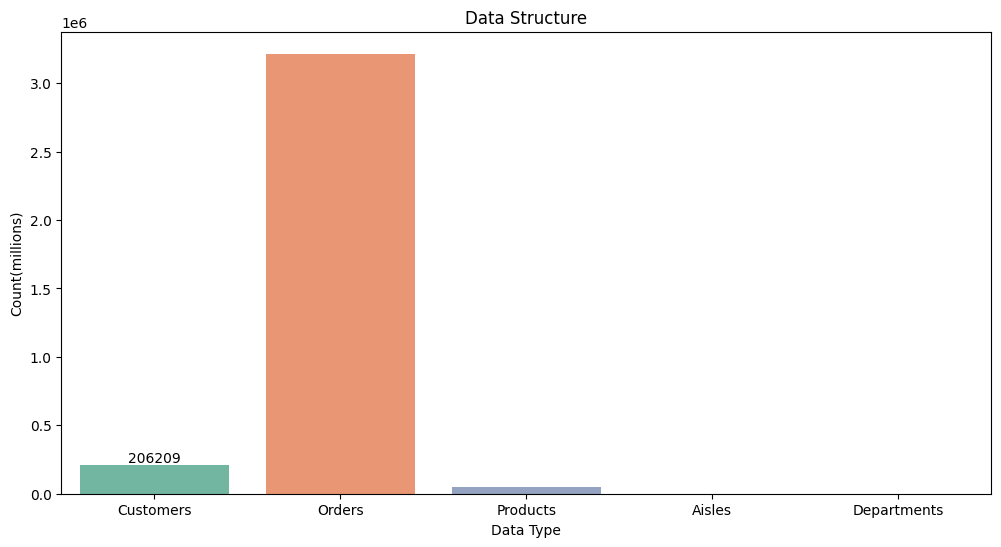

In [26]:

data = {
        'Customers': len(orders_complete_prior['user_id'].unique()),
        'Orders': len(order_products_prior['order_id'].unique()),
        'Products': len(products_complete['product_id'].unique()),
        'Aisles': len(aisles['aisle_id'].unique()),
        'Departments': len(departments['department_id'].unique())
        }
data_structure = pd.DataFrame(data, index=[0])

plt.figure(figsize=(12,6))
ax = sns.barplot(data = data_structure, palette = 'Set2')
ax.bar_label(ax.containers[0])
plt.title('Data Structure')
plt.xlabel('Data Type')
plt.ylabel('Count(millions)')


<h4>When do people place their orders? </h4>

In dow i noticed a tendency that users place orders mostly in Sundays and Mondays, and then it normalizes. I assume is due users getting their groceries in the beginning of the week.

Similar pattern with  a outlier in day 7, there is a downward tendency from early days in the month to  another outlier in day 30, perhaps due 30 days months.


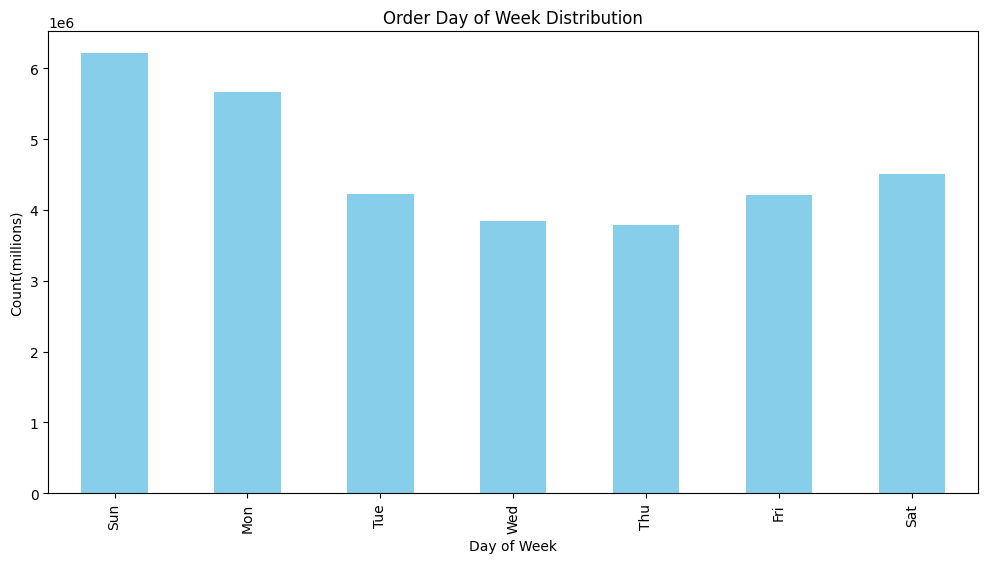

In [27]:
orders_complete_prior['order_dow'].value_counts().sort_index().plot(kind='bar', figsize=(12,6), color='skyblue')
plt.title('Order Day of Week Distribution')
plt.xlabel('Day of Week')
plt.ylabel('Count(millions)')
plt.xticks(range(7), ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.show()

Text(0.5, 1.0, 'Distribution of Days Since Prior Order')

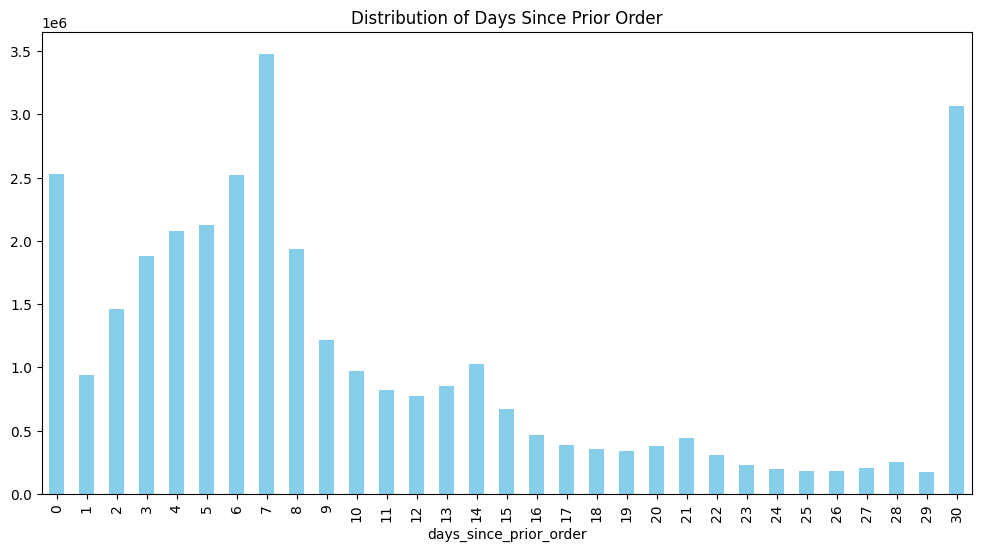

In [28]:
orders_complete_prior['days_since_prior_order'].value_counts().sort_index().plot(kind='bar', figsize=(12,6), color='skyblue')
plt.title('Distribution of Days Since Prior Order')

In [ ]:
sns.countplot(hours_of_day, kind='bar', figsize=(15,9), color='skyblue')

AttributeError: module 'seaborn' has no attribute 'plot'

<h3> Which products are frequently ordered? </h3>